# Creating a Neural Network via First Principles
+ Using the Iris dataset
+ Cross validation evaluation

In [227]:
from sklearn import datasets
import pandas as pd
from math import exp
from random import seed
from random import random
from random import randrange
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Importing the Iris Dataset

* classify 3 different flowers Setosa (0), Versicolor (1), Virginica (2)

In [228]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [229]:
iris_dataset = pd.DataFrame(features)
iris_dataset.rename(columns = {0:'SL', 1:'SW', 2:'PL', 3:'PW'}, inplace=True)

In [230]:
iris_dataset['target'] = target
iris_dataset

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [231]:
iris_dataset.dtypes

SL        float64
SW        float64
PL        float64
PW        float64
target      int32
dtype: object

# Data Distribution

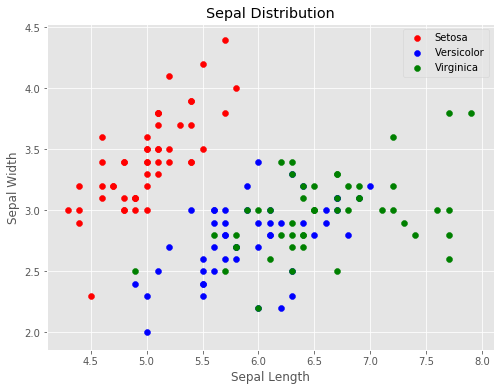

In [232]:
plt.figure(figsize = (8,6))
a = plt.scatter(iris_dataset[iris_dataset["target"] == 0]['SL'], iris_dataset[iris_dataset["target"] == 0]['SW'], c='red')
b = plt.scatter(iris_dataset[iris_dataset["target"] == 1]['SL'], iris_dataset[iris_dataset["target"] == 1]['SW'], c='blue')
c = plt.scatter(iris_dataset[iris_dataset["target"] == 2]['SL'], iris_dataset[iris_dataset["target"] == 2]['SW'], c='green')
plt.legend((a,b,c), ("Setosa", "Versicolor", "Virginica"))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Distribution")
plt.show()

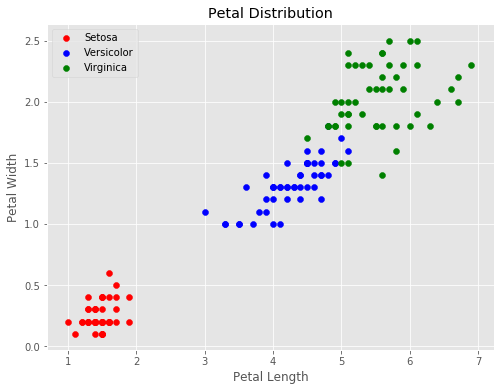

In [233]:
plt.figure(figsize = (8,6))
a = plt.scatter(iris_dataset[iris_dataset["target"] == 0]['PL'], iris_dataset[iris_dataset["target"] == 0]['PW'], c='red')
b = plt.scatter(iris_dataset[iris_dataset["target"] == 1]['PL'], iris_dataset[iris_dataset["target"] == 1]['PW'], c='blue')
c = plt.scatter(iris_dataset[iris_dataset["target"] == 2]['PL'], iris_dataset[iris_dataset["target"] == 2]['PW'], c='green')
plt.legend((a,b,c), ("Setosa", "Versicolor", "Virginica"))
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Distribution")
plt.show()

# Helper Functions

In [234]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats

In [235]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [236]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [237]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Activation Function
+ Using Sigmoid activation function.

In [238]:
# Transfer neuron activation function
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [239]:
# Calculate the derivative of a neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [240]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Initialize the network
* Each layer is an array of dictionaries.
* The whole network is an array of layers.
* The network weights are initialized to small random numbers.

> Creating an initialize network function that accepts three parameters
* Number of inputs
* Number of neurons in hidden layer
* Number of outputs


In [241]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

# Forward Propagate
+ Predictions are generated during training, which would have to be corrected. 
+ Described as the process **neuron activation**, **neuron transfer** followed by **neuron propagation.**

In [242]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Training the network

In [243]:
# Train the network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[int(row[-1])] = 1
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)

# Backpropagate with gradient descent

## Applying the backprogation to the IRIS dataset
* Normalized the input values to range of the chosen transfer function (sigmoid = between 0-1)
* Evaluate the algorithm with k-fold cross validation
* cross-validation and accuracy metric to calculate the accuracy of predictions

* back_propagation() : first initialize a network, train it on the training dataset and then, use the trained network to make predictions on a test set.

In [244]:
# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    
    for layer in network:
        print("\nLayer: {}".format(layer))
        
    train_network(network, train, l_rate, n_epoch, n_outputs)
    predictions = list()
    for row in test:
        prediction = predict(network, row)
        predictions.append(prediction)
        
    print("\nPredictions: {}".format(predictions))
    return(predictions)

# Backpropagate error

In [245]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update Weights 

In [246]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

# Evaluate Algorithm

In [247]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    print("\nActual Value: {}".format(actual))
    return scores

# Prediction

In [248]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    print("\nOutputs: {}".format(outputs))
    return outputs.index(max(outputs))

# Running the network on the Iris dataset
* Dataset Normalized
* Sigmoid Activation function

In [249]:
seed(1)
# load data
dataset = iris_dataset.values

#find min and max values to use for normalization
minmax = dataset_minmax(dataset)

# normalize input variables
normalize_dataset(dataset, minmax)

# evaluation metrics
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5

# Run 
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)

print('\nScores: %s' % scores)
print('\nMean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


Layer: [{'weights': [0.8610088608533248, 0.798438940577426, 0.7970975626354962, 0.8164373705606909, 0.25529404008730594]}, {'weights': [0.841744832274096, 0.6731135254387071, 0.08323413780389788, 0.0166906301155596, 0.014559974924812313]}, {'weights': [0.7555867752521982, 0.2495592256534228, 0.10948862729435938, 0.6248020841524763, 0.3444228640964949]}, {'weights': [0.06951537853084733, 0.1596255246938475, 0.5273803990480128, 0.16814494622242826, 0.2729144368186801]}, {'weights': [0.7115899271852729, 0.4547016300456639, 0.3220017663873259, 0.4737710141702789, 0.023634577631987064]}]

Layer: [{'weights': [0.38655710476146987, 0.4209186792090759, 0.18803930475131292, 0.10876169244541334, 0.8998185003560202, 0.5101159809286764]}, {'weights': [0.2090909925517701, 0.6056486400340165, 0.8170396683778869, 0.020818108509287336, 0.017864520827795327, 0.146461740399346]}, {'weights': [0.7188354727617898, 0.16022759262970465, 0.7046056278520025, 0.6781757952769475, 0.5447021635789044, 0.22059974

Outputs: [3.061751663398727e-05, 0.04628574338008566, 0.9515563206783865]
Outputs: [0.0052464460250556625, 0.9881893615843902, 0.00516944621551809]
Outputs: [0.9911831553253965, 0.008946186435231738, 1.856092456579509e-05]
Outputs: [1.2074579507209106e-05, 0.0124757870123712, 0.9891541609057914]
Outputs: [4.313525526738589e-06, 0.0036613803632944723, 0.9975995878331811]
Outputs: [0.9890851079551605, 0.011678699516387978, 2.0568521185362775e-05]
Outputs: [0.9900333831547682, 0.009750212125454386, 1.982900930573797e-05]
Outputs: [1.2016483762288723e-05, 0.01268499948915275, 0.9895483701024004]
Outputs: [0.005094152820489203, 0.9905546710241732, 0.00420286954038016]
Outputs: [0.013018134856262005, 0.9938964834974843, 0.0014298740585813223]
Outputs: [4.661692552534205e-06, 0.003972665546661207, 0.9974183588642891]

Predictions: [2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2]

Layer: [{'weights': [0.3780396288383874, 0.5707815255990233, 0.223714072

# Conclusion

The final results show the outputs for each fold and how they performed. The model performed excellently due to all the pre processing that was performed. The normalization turned all the variables into the same scale, which is between 0 and 1, that combined with the sigmoid activation function which is between also between 0 and 1. After some testing, the sigmoid activation function, data normalization, 5 hidden neurons, 500 iterations, and a learning rate of 0.3 generated the best results by the network. 
